In [10]:
from yolov3_core import *

import matplotlib.pyplot as plt
import cv2
import time

In [11]:
samples_path = "data/samples/"
samples = os.listdir(samples_path)

In [3]:
settings = {'model_def': "cfg/yolov3-spp-1cls.cfg",
            'weights_path': "weights/416_1_4_full_best200ep.pt",
            'class_path': "cfg/classes.names",
            'img_size': 608,
            'iou_thres': 0.6,
            'no_gpu': True,
            'conf_thres': 0.3,
            'batch_size': 6,
            'augment': None,
            'classes': None}

model = YoloModelLatest(settings)

{'model_def': 'cfg/yolov3-spp-1cls.cfg', 'weights_path': 'weights/416_1_4_full_best200ep.pt', 'class_path': 'cfg/classes.names', 'img_size': 608, 'iou_thres': 0.6, 'no_gpu': True, 'conf_thres': 0.3, 'batch_size': 6, 'augment': None, 'classes': None}
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Model Succesfully Loaded


## Test processing one image

In [4]:
img = cv2.imread(os.path.join(samples_path, samples[0]))
outputs = model.pass_model(img, passes=4)

/usr/local/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


KeyboardInterrupt: 

In [51]:
p = non_max_suppression_post(outputs, overlapThresh=0.1)

In [52]:
img_copy = img.copy()

0.6392062306404114
0.7971447706222534
0.5747198462486267
0.7567864060401917
0.570518970489502
0.6597200036048889
0.8393150568008423
0.7277640104293823
0.6861152052879333
0.8202545642852783
0.7181941866874695
0.8623050451278687


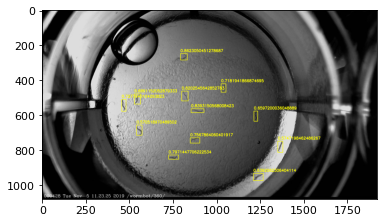

In [53]:
draw_from_output(img_copy, p, text="t")
plt.imshow(img_copy)

In [54]:
plt.imsave("/Users/paolobifulco/Downloads/test.png", img_copy)

In [13]:
len(outputs)

7

## Testing YOLO_toCSV

In [14]:
df = YoloToCSV.pd_for_csv(p, True, "test")

In [15]:
x1, y1, x2, y2, conf, _ = p[0]

In [14]:
print("es")

es


## Testing the circle croping and passing smaller images into model

In [4]:
cropped_path = "data/samples/croped_test.png"
cropped_image = cv2.imread(cropped_path)

In [5]:
outputs2 = model.pass_model(cropped_image)

/usr/local/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


KeyboardInterrupt: 

In [ ]:
p2= non_max_suppression_post(outputs2, overlapThresh=0.1)

In [ ]:
draw_from_output(cropped_image, p2, text="t")
plt.imshow(cropped_image)

In [14]:
plt.imsave("/Users/paolobifulco/Downloads/test_crop.png", cropped_image)

tensor(0.59826)
tensor(0.85692)
tensor(0.84616)
tensor(0.84087)
tensor(0.75796)
tensor(0.64515)
tensor(0.63644)
tensor(0.86660)
tensor(0.85559)
tensor(0.85484)
tensor(0.77924)
tensor(0.73755)
tensor(0.67941)
tensor(0.90118)
tensor(0.81710)
tensor(0.36267)
tensor(0.46277)
tensor(0.88445)
tensor(0.87436)
tensor(0.87340)
tensor(0.86998)
tensor(0.82825)
tensor(0.70838)
tensor(0.77790)
tensor(0.87380)
tensor(0.82649)
tensor(0.72141)
tensor(0.85087)
tensor(0.41335)
tensor(0.84624)
tensor(0.81540)
tensor(0.70684)
tensor(0.89054)
tensor(0.87943)
tensor(0.77230)
tensor(0.44345)
tensor(0.41188)
tensor(0.88485)
tensor(0.88158)
tensor(0.88141)
tensor(0.87309)
tensor(0.81997)
tensor(0.81932)
tensor(0.76171)
tensor(0.74304)
tensor(0.68880)
tensor(0.50179)
tensor(0.86180)
tensor(0.78186)


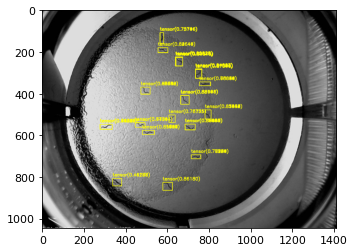

In [16]:
draw_from_output(cropped_image, outputs2, text="t")
plt.imshow(cropped_image)

In [12]:
circler = ImageCircleCrop(5)
samples[9]
samples_path = "data/samples/"
samples = os.listdir(samples_path)
samples = [os.path.join(samples_path, i) for i in samples]

In [ ]:
start = time.

In [5]:
img = cv2.imread(samples[9])
testCircles = circler.find_circle(img)

In [6]:
circler.circle

(948, 500, 617)

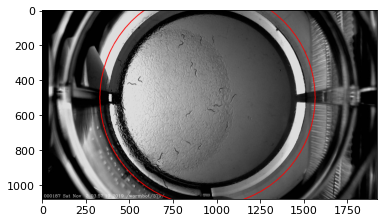

In [7]:
cv2.circle(img, (testCircles[0], testCircles[1]), testCircles[2], (255,0,0), 3)
plt.imshow(img)

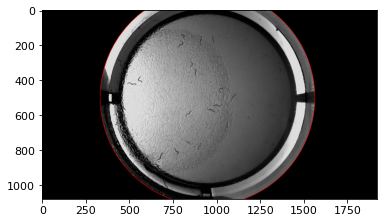

In [8]:
masked = circler.mask_image(img, circler.circle)
plt.imshow(masked)

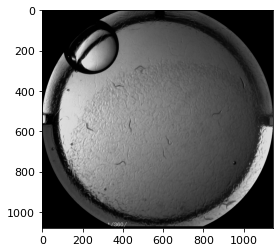

In [9]:
test = circler.update(samples[3])
plt.imshow(test)

In [29]:
t = circler.crop_img(cv2.imread(samples[9]))

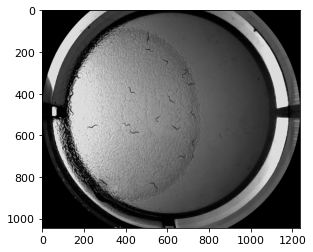

In [11]:
plt.imshow(t)

(941, 502, 563)


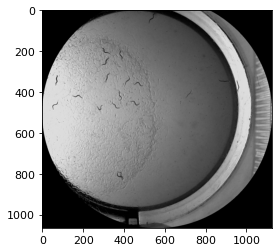

In [20]:
test = circler.update(samples[6])
plt.imshow(test)
print(circler.circle)

In [21]:
circler.frame_count

8

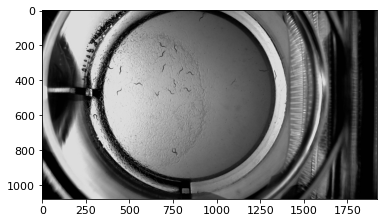

In [15]:
plt.imshow(cv2.imread(samples[6]))

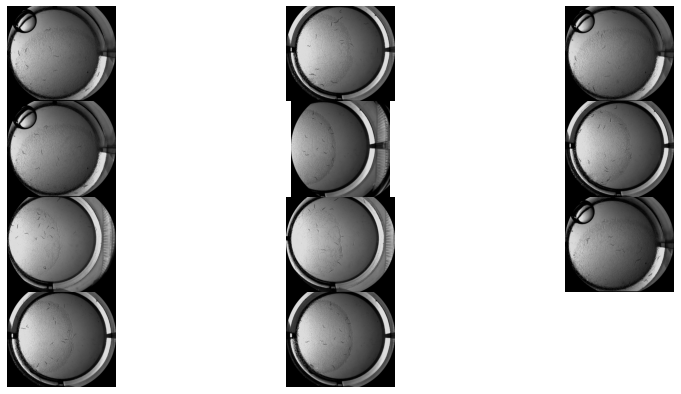

In [65]:
# Plot images
fig = plt.figure(figsize=(15, 7))
cols = int(len(samples) ** 0.5)
rows = cols + 1

for i, sample in enumerate(samples):
    fig.add_subplot(rows, cols, i + 1)
    result = circler.crop_img(cv2.imread(sample))
    plt.axis('off')
    plt.imshow(result)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("/Users/paolobifulco/Downloads/crop.png", bbox_inches="tight")

In [52]:
a = cv2.imread(samples[8])
a

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [39]:
samples[8]

'data/samples/.ipynb_checkpoints'